In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.shape

(2000, 21)

In [4]:
test.shape

(1000, 21)

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.columns = ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera_MP', '4G',
       'int_memoryGB', 'mobile_depth', 'mobile_wt', 'n_cores', 'PC_MP', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', '3G',
       'touch_screen', 'wifi', 'price_range']
test.columns= ['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera_MP', '4G',
       'int_memoryGB', 'mobile_depth', 'mobile_wt', 'n_cores', 'PC_MP', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', '3G',
       'touch_screen', 'wifi', 'price_range']

In [7]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,4G,int_memoryGB,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,4G,int_memoryGB,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# pd.set_option('precision', 2)
df.corr(method='pearson')

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,4G,int_memoryGB,mobile_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
bluetooth,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
front_camera_MP,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
4G,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memoryGB,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
mobile_depth,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


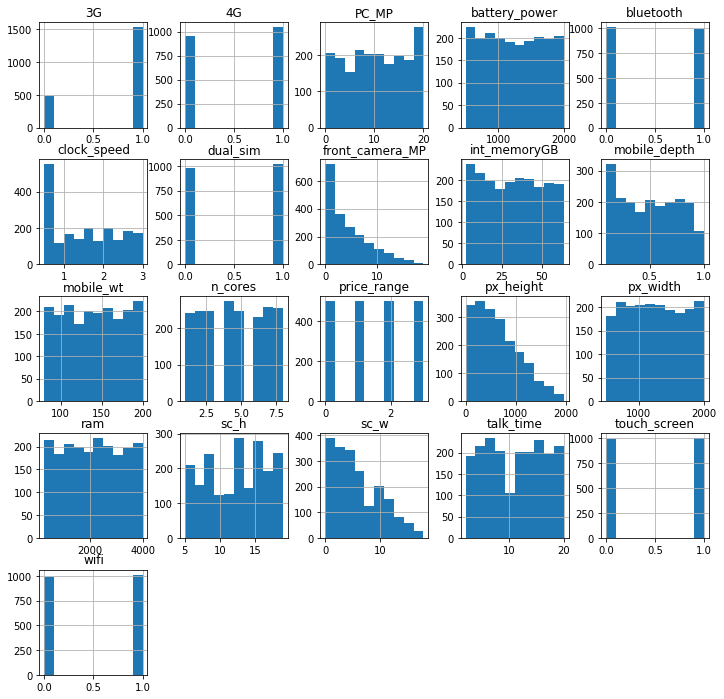

In [10]:
#data visualization
df.hist(sharex=False, sharey=False, figsize=(12,12) )
plt.show()

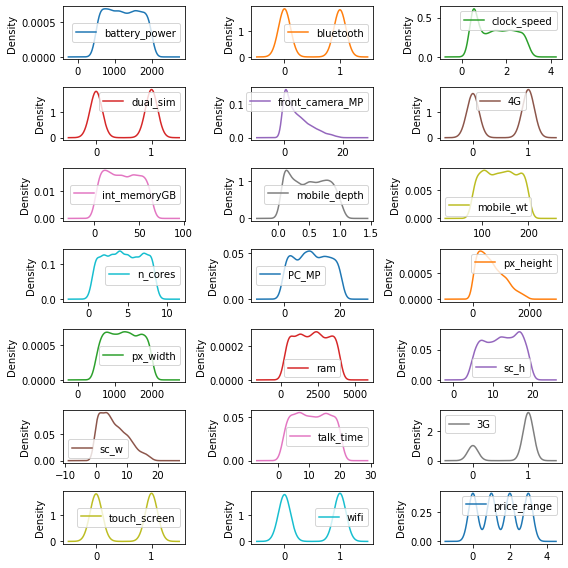

In [11]:
df.plot(kind='density', subplots=True, sharex=False, sharey=False, figsize=(8,8), layout=(7,3))
plt.tight_layout()
plt.show()

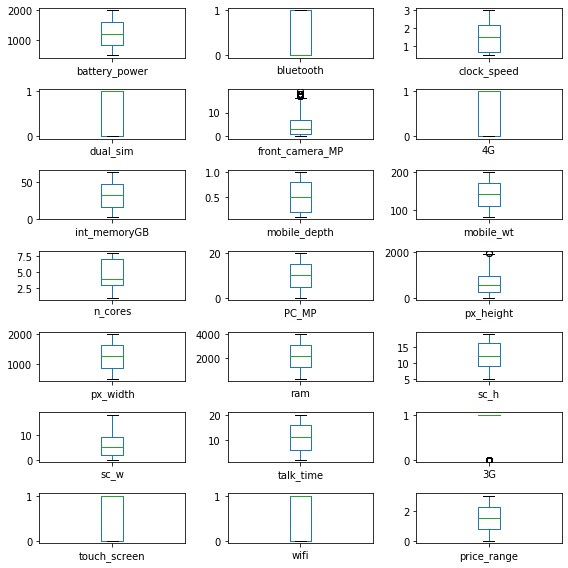

In [12]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(8,8), layout=(7,3))
plt.tight_layout()
plt.show()

In [13]:
#split the data set
array = df.values

X = array[:, :20] # input
Y = array[:, 20] # output

validation_size =.50
seed=7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [14]:
# models for classification
models =[]
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=10)))

In [15]:
#evaluating model one by one
for name, model in models:
    kfold = KFold(n_splits=9,random_state=seed)
    cv = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(name, cv.mean(), cv.std())

NB 0.7839446589446589 0.0398338506812326
SVM 0.23802373802373802 0.021087551858128106
KNN 0.913967538967539 0.031006020639073786
CART 0.815976690976691 0.05016281652019559
RF 0.7399184899184899 0.04574943123710745


In [16]:
#knn have highest accuracy so...

In [17]:
test_array = df.values
test_input = test_array[:, :20] # input
test_output = test_array[:, 20] # output

In [18]:
knn = KNeighborsClassifier()
knn.fit(X, Y)
predicted_output = knn.predict(test_input)

In [19]:
accuracy_score(test_output, predicted_output)

0.954

In [20]:
pd.DataFrame(predicted_output, columns=['predictions']).to_csv('mobile.csv')

In [21]:
#confusion matrix
confusion_matrix(test_output, predicted_output)

array([[487,  13,   0,   0],
       [ 12, 475,  13,   0],
       [  0,  21, 463,  16],
       [  0,   0,  17, 483]], dtype=int64)

In [22]:
#classification report
print(classification_report(test_output, predicted_output))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       500
         1.0       0.93      0.95      0.94       500
         2.0       0.94      0.93      0.93       500
         3.0       0.97      0.97      0.97       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

